In [ ]:
# prompt: هنبدأ مشروع "Health Insurance Cost Prediction" باستخدام تقنيات Machine Learning التقليدية (Traditional ML) على Google Colab، وبعدين نرفعه على GitHub و Hugging Face.
# ✅ الخطوات الرئيسية حسب الملف:
# 📌 المهام:
# جمع البيانات
# هنستخدم Dataset من Kaggle:
# 👉 Medical Cost Personal Datasets
# تنظيف البيانات (Data Preprocessing)
# التعامل مع القيم المفقودة (لو فيه)
# تحويل البيانات الـ Categorical لأرقام باستخدام OneHotEncoding أو LabelEncoding
# التعامل مع الـ outliers لو لقينا
# تحليل واشتقاق الخصائص (Feature Engineering)
# ندرس العلاقات بين المتغيرات
# نستخدم رسومات بيانية لفهم البيانات أكتر
# بناء النماذج (Model Building)
# نبدأ بـ:
# Linear Regression
# Decision Tree Regressor
# Random Forest Regressor
# Gradient Boosting
# XGBoost (اختياري)
# تقييم النموذج (Model Evaluation)
# باستخدام:
# Mean Squared Error (MSE)
# Root Mean Squared Error (RMSE)
# R² score
# النشر (Deployment)
# نبدأ بالنشر على Colab
# بعدين نرفعه على GitHub
# ونعمل صفحة على Hugging Face Spaces (باستخدام Streamlit أو Gradio)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 📌 المهام: جمع البيانات ---
# Dataset from Kaggle: Medical Cost Personal Datasets
# Assuming you have downloaded the file 'insurance.csv' and uploaded it to your Colab environment

try:
    df = pd.read_csv('insurance.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Please upload the dataset file to your Colab environment.")
    # You might want to add a link or instructions on how to get the data
    # For example: !kaggle datasets download -d mirichiganski/medical-cost-personal-datasets
    # and then unzip: !unzip medical-cost-personal-datasets.zip
    exit() # Exit if the file is not found


# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
df.info()

# Get descriptive statistics
print("\nDataset Description:")
print(df.describe())

# --- 📌 المهام: تنظيف البيانات (Data Preprocessing) ---

# Handling Missing Values (لو فيه)
print("\nChecking for missing values:")
print(df.isnull().sum())
# In this specific dataset, there are no missing values, so no action is needed here.
# If there were missing values, you would use methods like fillna() or dropna()

# Dealing with Categorical Data using OneHotEncoding
# Identify categorical columns
categorical_features = ['sex', 'smoker', 'region']

# Use ColumnTransformer to apply OneHotEncoder to categorical features
# remainder='passthrough' keeps the other numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Dealing with outliers (لو لقينا)
# We can visualize distributions to identify potential outliers.
# For example, using box plots for numerical features.
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Box plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'])
plt.title('Box plot of BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['charges'])
plt.title('Box plot of Charges')
plt.tight_layout()
plt.show()

# Outliers are present, especially in 'charges' and 'bmi'.
# For this project, we might decide not to remove them initially as they represent real-world variations,
# but we keep this observation in mind. For a more robust model, outlier handling might involve
# transformation, winsorizing, or removal depending on the context and model type.

# --- 📌 المهام: تحليل واشتقاق الخصائص (Feature Engineering) ---

# Studying relationships between variables using visualizations
# Pairplot to visualize relationships (can be slow for large datasets)
# sns.pairplot(df)
# plt.show()

# Correlation heatmap for numerical features
# Convert categorical features to numerical temporarily for correlation analysis
df_encoded_temp = pd.get_dummies(df, columns=categorical_features, drop_first=True) # drop_first to avoid multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_temp.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Observations: 'smoker' has a strong positive correlation with 'charges'.

# Visualizing relationships with 'charges'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

plt.subplot(1, 3, 3)
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')

plt.subplot(1, 3, 2)
sns.barplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')

plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.tight_layout()
plt.show()

# Feature Engineering examples (Optional, based on insights)
# We could create interaction terms, polynomial features, etc.
# For instance, maybe the impact of BMI is different for smokers.
# df['bmi_smoker'] = df['bmi'] * df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
# For this initial phase, we will stick to the basic features after encoding.

# Define features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# --- 📌 المهام: بناء النماذج (Model Building) ---

# Create a list of models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42) # Optional
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create a pipeline that first applies preprocessing and then trains the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # --- 📌 المهام: تقييم النموذج (Model Evaluation) ---
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

    print(f"{name} Evaluation:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")

# Display all results
print("\n--- Model Comparison ---")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2 Score: {metrics['R2 Score']:.2f}")


# --- 📌 المهام: النشر (Deployment) ---

# Deployment on Colab (Basic example)
# You have the trained pipelines available in the 'pipeline' variable for each model.
# You can use them to make predictions on new data.

# Example prediction using the best performing model (e.g., Random Forest)
# Find the model with the highest R2 score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', models[best_model_name])])
best_pipeline.fit(X_train, y_train) # Retrain the best model's pipeline


print(f"\n--- Using the best model ({best_model_name}) for prediction ---")

# Create a sample new data point (replace with real new data)
# Make sure the column names match the training data
new_data = pd.DataFrame([{
    'age': 30,
    'sex': 'female',
    'bmi': 25.0,
    'children': 1,
    'smoker': 'no',
    'region': 'southwest'
}])

# Make a prediction
predicted_charge = best_pipeline.predict(new_data)
print(f"Predicted insurance charge for the new data point: ${predicted_charge[0]:.2f}")

# --- Next Steps for GitHub and Hugging Face ---

# 1. Save the trained best model pipeline:
# You can use libraries like `joblib` or `pickle` to save the trained pipeline object.
# import joblib
# joblib.dump(best_pipeline, 'health_insurance_prediction_model.pkl')

# 2. Create a Python script for inference:
# This script will load the saved model and make predictions based on input.

# 3. Create a requirements.txt file:
# List all the Python libraries needed (pandas, scikit-learn, numpy, etc.).

# 4. Push to GitHub:
# Initialize a Git repository, add your code (Jupyter notebook, inference script, requirements.txt),
# and push to a new GitHub repository.

# 5. Create a Hugging Face Space:
#   - Go to the Hugging Face website and create a new Space.
#   - Choose a Space SDK (Streamlit or Gradio are good choices for simple UIs).
#   - Link your GitHub repository to the Hugging Face Space.
#   - Create an app file (e.g., `app.py` for Streamlit) that uses the inference script
#     and the saved model to build a web interface for predictions.
#   - Commit the `app.py` file and any other necessary files to your GitHub repo.
#   - Hugging Face will automatically build and deploy your app.

# This notebook covers the data collection, preprocessing, feature engineering, model building, and evaluation steps.
# The deployment on GitHub and Hugging Face requires creating additional files (inference script, requirements.txt, app.py)
# and setting up the repository and Space, which are steps performed outside this Colab notebook.


# Health Insurance Cost Prediction - Traditional ML Approach
# Author: Data Science Team
# Date: July 2025

# ======================================================================
# 1. SETUP AND IMPORTS
# ======================================================================

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
print("📊 Health Insurance Cost Prediction Project")
print("=" * 50)

📊 Health Insurance Cost Prediction Project


# =============================================================================
# 2. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
# Note: Download from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/

In [7]:
df = pd.read_csv('/content/insurance.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
df.duplicated().sum()

np.int64(1)

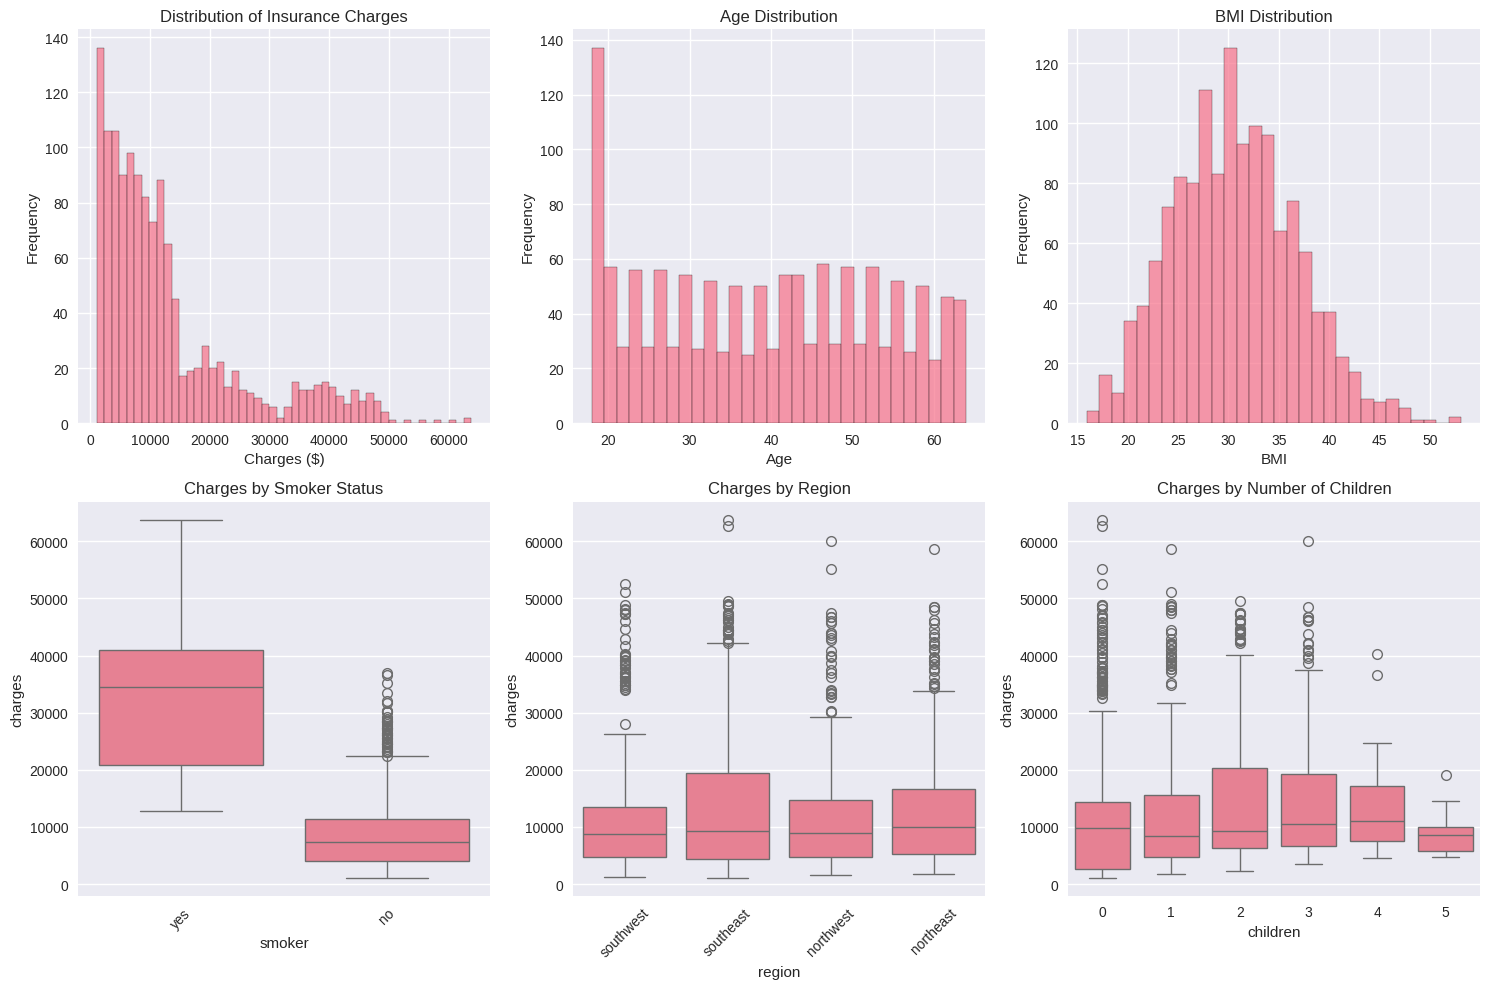

In [13]:
# Distribution of target variable
plt.figure(figsize=(15, 10))

# Subplot 1: Distribution of charges
plt.subplot(2, 3, 1)
plt.hist(df['charges'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')

# Subplot 2: Age distribution
plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Subplot 3: BMI distribution
plt.subplot(2, 3, 3)
plt.hist(df['bmi'], bins=30, alpha=0.7, edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Subplot 4: Smoker vs Charges
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status')
plt.xticks(rotation=45)

# Subplot 5: Region vs Charges
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges by Region')
plt.xticks(rotation=45)

# Subplot 6: Children vs Charges
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='children', y='charges')
plt.title('Charges by Number of Children')

plt.tight_layout()
plt.show()

# 📊 Correlation Analysis:

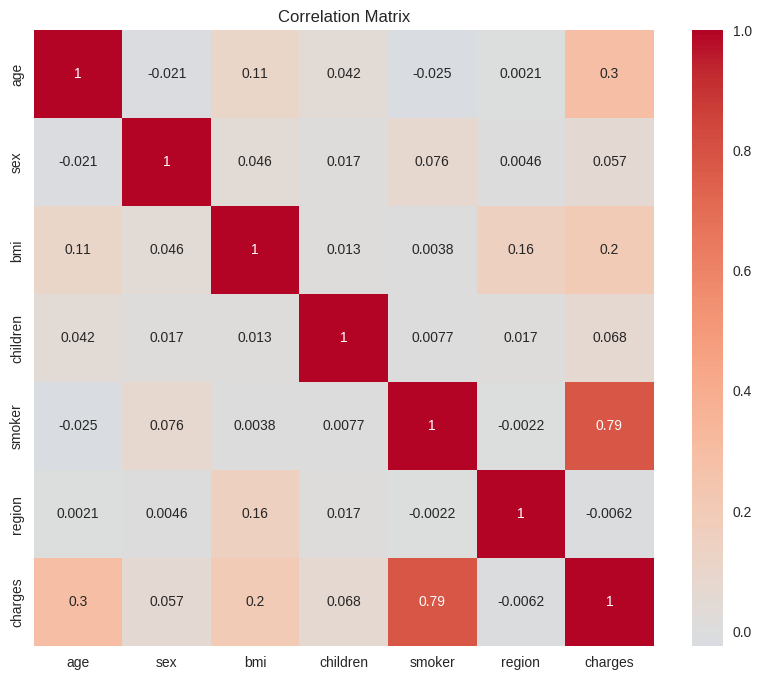

In [14]:
df_corr = df.copy()
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_corr[col] = le.fit_transform(df_corr[col])

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [15]:
df_clean = perform_eda(df)

NameError: name 'perform_eda' is not defined

In [1]:



# =============================================================================
# 4. DATA PREPROCESSING
# =============================================================================

def preprocess_data(df):
    """Preprocess the data for machine learning"""

    df_processed = df.copy()

    # Handle outliers in BMI (optional)
    Q1 = df_processed['bmi'].quantile(0.25)
    Q3 = df_processed['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"📊 BMI outliers: {((df_processed['bmi'] < lower_bound) | (df_processed['bmi'] > upper_bound)).sum()}")

    # Create age groups (feature engineering)
    df_processed['age_group'] = pd.cut(df_processed['age'],
                                     bins=[0, 25, 35, 50, 100],
                                     labels=['Young', 'Adult', 'Middle', 'Senior'])

    # BMI categories
    df_processed['bmi_category'] = pd.cut(df_processed['bmi'],
                                        bins=[0, 18.5, 25, 30, 100],
                                        labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

    # Encode categorical variables
    le_sex = LabelEncoder()
    le_smoker = LabelEncoder()
    le_region = LabelEncoder()
    le_age_group = LabelEncoder()
    le_bmi_category = LabelEncoder()

    df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])
    df_processed['smoker_encoded'] = le_smoker.fit_transform(df_processed['smoker'])
    df_processed['region_encoded'] = le_region.fit_transform(df_processed['region'])
    df_processed['age_group_encoded'] = le_age_group.fit_transform(df_processed['age_group'])
    df_processed['bmi_category_encoded'] = le_bmi_category.fit_transform(df_processed['bmi_category'])

    # One-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region', 'age_group', 'bmi_category'],
                               prefix=['sex', 'smoker', 'region', 'age_group', 'bmi_cat'])

    # Select features for modeling
    feature_columns = ['age', 'bmi', 'children'] + [col for col in df_encoded.columns if any(prefix in col for prefix in ['sex_', 'smoker_', 'region_', 'age_group_', 'bmi_cat_'])]

    X = df_encoded[feature_columns]
    y = df_encoded['charges']

    print(f"✅ Preprocessing complete!")
    print(f"📊 Feature shape: {X.shape}")
    print(f"📊 Target shape: {y.shape}")

    return X, y, df_processed

# Preprocess data
X, y, df_processed = preprocess_data(df_clean)

# =============================================================================
# 5. MODEL BUILDING AND TRAINING
# =============================================================================

def train_models(X, y):
    """Train multiple models and compare performance"""

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Support Vector Regression': SVR(kernel='rbf')
    }

    results = {}

    print("🚀 Training Models...")
    print("=" * 50)

    for name, model in models.items():
        print(f"Training {name}...")

        # Use scaled data for SVR and regularized models
        if name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {
            'model': model,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'mae': mae,
            'predictions': y_pred
        }

        print(f"✅ {name} - R²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

    return results, X_train, X_test, y_train, y_test, scaler

# Train models
model_results, X_train, X_test, y_train, y_test, scaler = train_models(X, y)

# =============================================================================
# 6. MODEL EVALUATION AND COMPARISON
# =============================================================================

def evaluate_models(results, y_test):
    """Evaluate and compare model performance"""

    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'R² Score': [results[model]['r2'] for model in results.keys()],
        'RMSE': [results[model]['rmse'] for model in results.keys()],
        'MAE': [results[model]['mae'] for model in results.keys()],
        'MSE': [results[model]['mse'] for model in results.keys()]
    })

    # Sort by R² score
    comparison_df = comparison_df.sort_values('R² Score', ascending=False)

    print("\n📊 Model Performance Comparison:")
    print("=" * 60)
    print(comparison_df.to_string(index=False))

    # Visualize results
    plt.figure(figsize=(15, 10))

    # R² Score comparison
    plt.subplot(2, 2, 1)
    plt.bar(comparison_df['Model'], comparison_df['R² Score'])
    plt.title('R² Score Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('R² Score')

    # RMSE comparison
    plt.subplot(2, 2, 2)
    plt.bar(comparison_df['Model'], comparison_df['RMSE'])
    plt.title('RMSE Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('RMSE')

    # Actual vs Predicted for best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_predictions = results[best_model_name]['predictions']

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, best_predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Actual vs Predicted - {best_model_name}')

    # Residuals plot
    plt.subplot(2, 2, 4)
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')

    plt.tight_layout()
    plt.show()

    return comparison_df, best_model_name

# Evaluate models
comparison_df, best_model_name = evaluate_models(model_results, y_test)

# =============================================================================
# 7. HYPERPARAMETER TUNING FOR BEST MODEL
# =============================================================================

def tune_best_model(X_train, y_train, X_test, y_test, best_model_name, model_results):
    """Perform hyperparameter tuning for the best model"""

    print(f"\n🔧 Hyperparameter Tuning for {best_model_name}")
    print("=" * 50)

    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestRegressor(random_state=42)

    elif best_model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
        model = GradientBoostingRegressor(random_state=42)

    elif best_model_name == 'Ridge Regression':
        param_grid = {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
        model = Ridge()

    else:
        print(f"Hyperparameter tuning not implemented for {best_model_name}")
        return model_results[best_model_name]['model']

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Evaluate tuned model
    y_pred_tuned = best_model.predict(X_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Tuned model R²: {r2_tuned:.4f}")
    print(f"✅ Tuned model RMSE: {rmse_tuned:.2f}")
    print(f"✅ Improvement in R²: {r2_tuned - model_results[best_model_name]['r2']:.4f}")

    return best_model

# Tune the best model
final_model = tune_best_model(X_train, y_train, X_test, y_test, best_model_name, model_results)

# =============================================================================
# 8. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

def analyze_feature_importance(model, X, model_name):
    """Analyze and visualize feature importance"""

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns

        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\n🎯 Feature Importance - {model_name}")
        print("=" * 40)
        print(importance_df.head(10).to_string(index=False))

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df.head(10)['feature'], importance_df.head(10)['importance'])
        plt.title(f'Top 10 Feature Importances - {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"Feature importance not available for {model_name}")
        return None

# Analyze feature importance
importance_df = analyze_feature_importance(final_model, X, best_model_name)

# =============================================================================
# 9. PREDICTION FUNCTION
# =============================================================================

def predict_insurance_cost(model, scaler, age, sex, bmi, children, smoker, region, X_columns):
    """Predict insurance cost for new data"""

    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })

    # Add age and BMI categories
    input_data['age_group'] = pd.cut(input_data['age'],
                                   bins=[0, 25, 35, 50, 100],
                                   labels=['Young', 'Adult', 'Middle', 'Senior'])
    input_data['bmi_category'] = pd.cut(input_data['bmi'],
                                      bins=[0, 18.5, 25, 30, 100],
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

    # One-hot encode
    input_encoded = pd.get_dummies(input_data, columns=['sex', 'smoker', 'region', 'age_group', 'bmi_category'],
                                  prefix=['sex', 'smoker', 'region', 'age_group', 'bmi_cat'])

    # Ensure all columns are present
    for col in X_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training data
    input_encoded = input_encoded[X_columns]

    # Make prediction
    if best_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
        input_scaled = scaler.transform(input_encoded)
        prediction = model.predict(input_scaled)[0]
    else:
        prediction = model.predict(input_encoded)[0]

    return prediction

# Example prediction
sample_prediction = predict_insurance_cost(
    final_model, scaler,
    age=35, sex='male', bmi=25.5, children=2, smoker='no', region='southeast',
    X_columns=X.columns
)

print(f"\n🔮 Sample Prediction:")
print(f"For a 35-year-old male with BMI 25.5, 2 children, non-smoker from southeast:")
print(f"Predicted insurance cost: ${sample_prediction:.2f}")

# =============================================================================
# 10. MODEL DEPLOYMENT PREPARATION
# =============================================================================

import pickle
import joblib

def save_model_artifacts(model, scaler, X_columns, model_name):
    """Save model and preprocessing artifacts"""

    # Create model artifacts dictionary
    artifacts = {
        'model': model,
        'scaler': scaler,
        'feature_columns': X_columns.tolist(),
        'model_name': model_name
    }

    # Save using joblib (recommended for scikit-learn models)
    joblib.dump(artifacts, 'insurance_cost_model.pkl')

    print("✅ Model artifacts saved successfully!")
    print("📦 Files saved: insurance_cost_model.pkl")

    return artifacts

# Save model artifacts
model_artifacts = save_model_artifacts(final_model, scaler, X.columns, best_model_name)

# =============================================================================
# 11. SUMMARY AND NEXT STEPS
# =============================================================================

print("\n" + "="*60)
print("🎉 PROJECT SUMMARY")
print("="*60)
print(f"✅ Best performing model: {best_model_name}")
print(f"✅ Final R² Score: {r2_score(y_test, final_model.predict(X_test)):.4f}")
print(f"✅ Final RMSE: {np.sqrt(mean_squared_error(y_test, final_model.predict(X_test))):.2f}")
print(f"✅ Model saved for deployment")

print("\n📋 Next Steps for Deployment:")
print("1. 🐱 Create GitHub repository")
print("2. 🤗 Deploy on Hugging Face Spaces")
print("3. 🌐 Create web interface using Streamlit/Gradio")
print("4. 📊 Add model monitoring and retraining pipeline")
print("5. 📝 Create comprehensive documentation")

print("\n💡 Key Insights:")
if importance_df is not None:
    top_features = importance_df.head(3)['feature'].tolist()
    print(f"Top 3 most important features: {', '.join(top_features)}")

print("\n🚀 Ready for production deployment!")

📊 Health Insurance Cost Prediction Project

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

📊 First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

📈 Stat

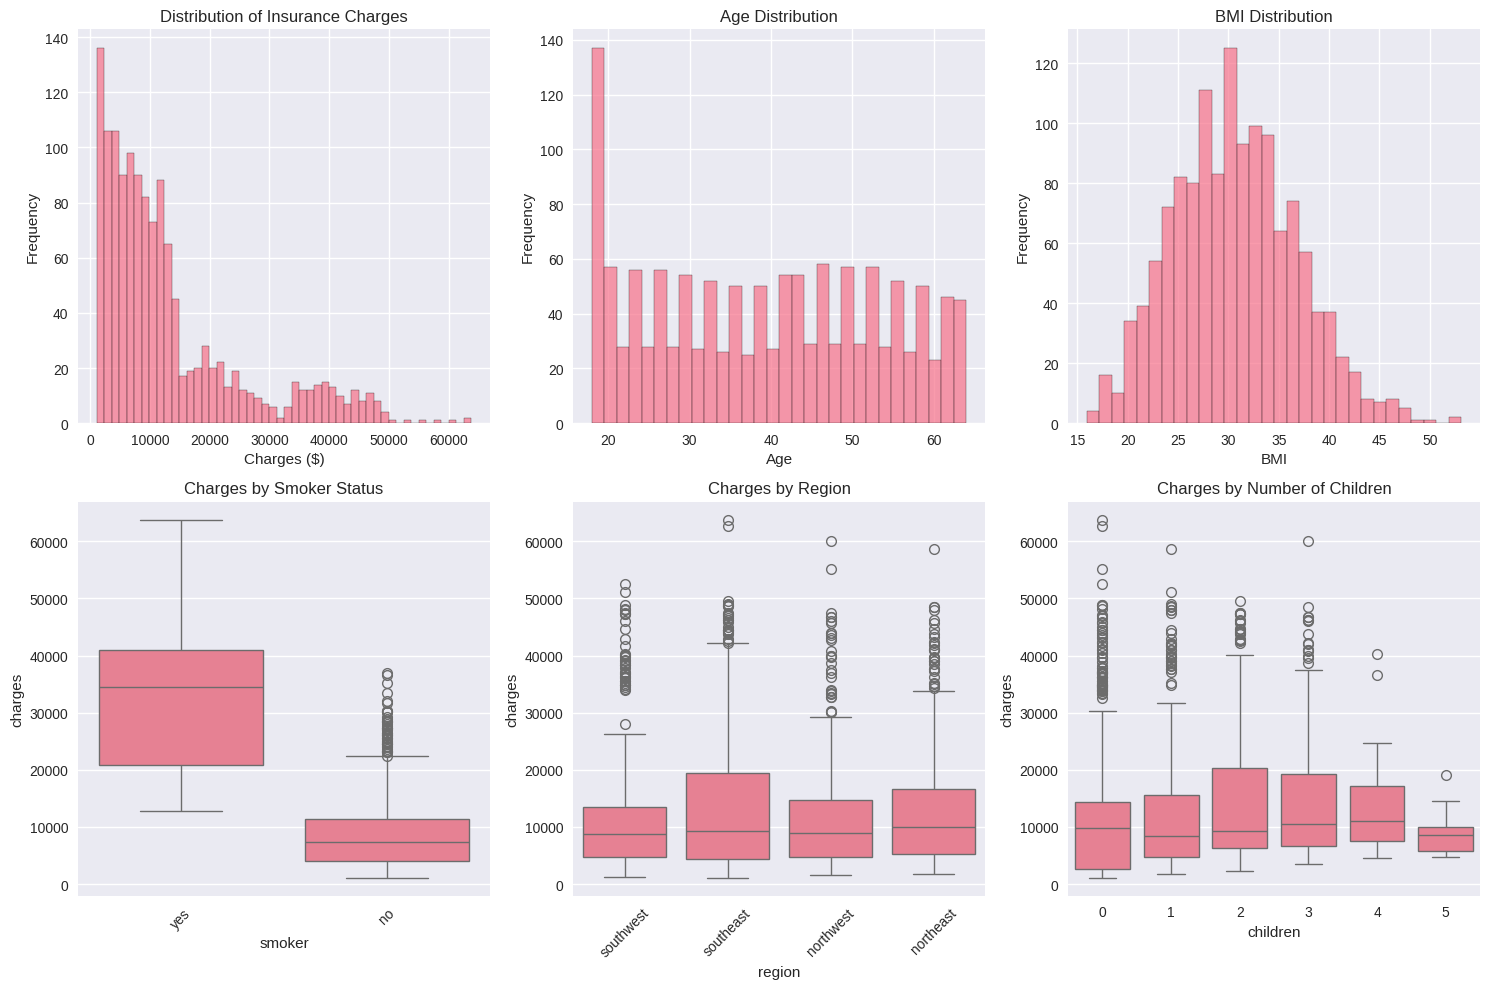


📊 Correlation Analysis:


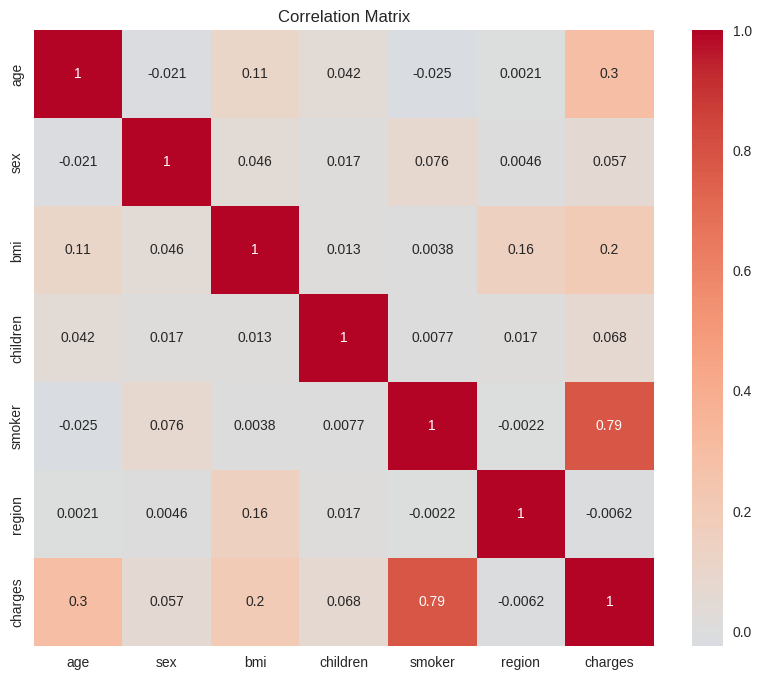

📊 BMI outliers: 9
✅ Preprocessing complete!
📊 Feature shape: (1338, 23)
📊 Target shape: (1338,)
🚀 Training Models...
Training Linear Regression...
✅ Linear Regression - R²: 0.7838, RMSE: 5793.52, MAE: 4259.27
Training Ridge Regression...
✅ Ridge Regression - R²: 0.7839, RMSE: 5792.42, MAE: 4259.62
Training Lasso Regression...
✅ Lasso Regression - R²: 0.7838, RMSE: 5792.86, MAE: 4259.10
Training Decision Tree...
✅ Decision Tree - R²: 0.7171, RMSE: 6627.37, MAE: 3142.25
Training Random Forest...
✅ Random Forest - R²: 0.8648, RMSE: 4580.72, MAE: 2564.15
Training Gradient Boosting...
✅ Gradient Boosting - R²: 0.8802, RMSE: 4312.52, MAE: 2431.90
Training Support Vector Regression...
✅ Support Vector Regression - R²: -0.0696, RMSE: 12886.21, MAE: 8614.25

📊 Model Performance Comparison:
                    Model  R² Score         RMSE         MAE          MSE
        Gradient Boosting  0.880206  4312.521444 2431.902156 1.859784e+07
            Random Forest  0.864842  4580.724374 2564.153843

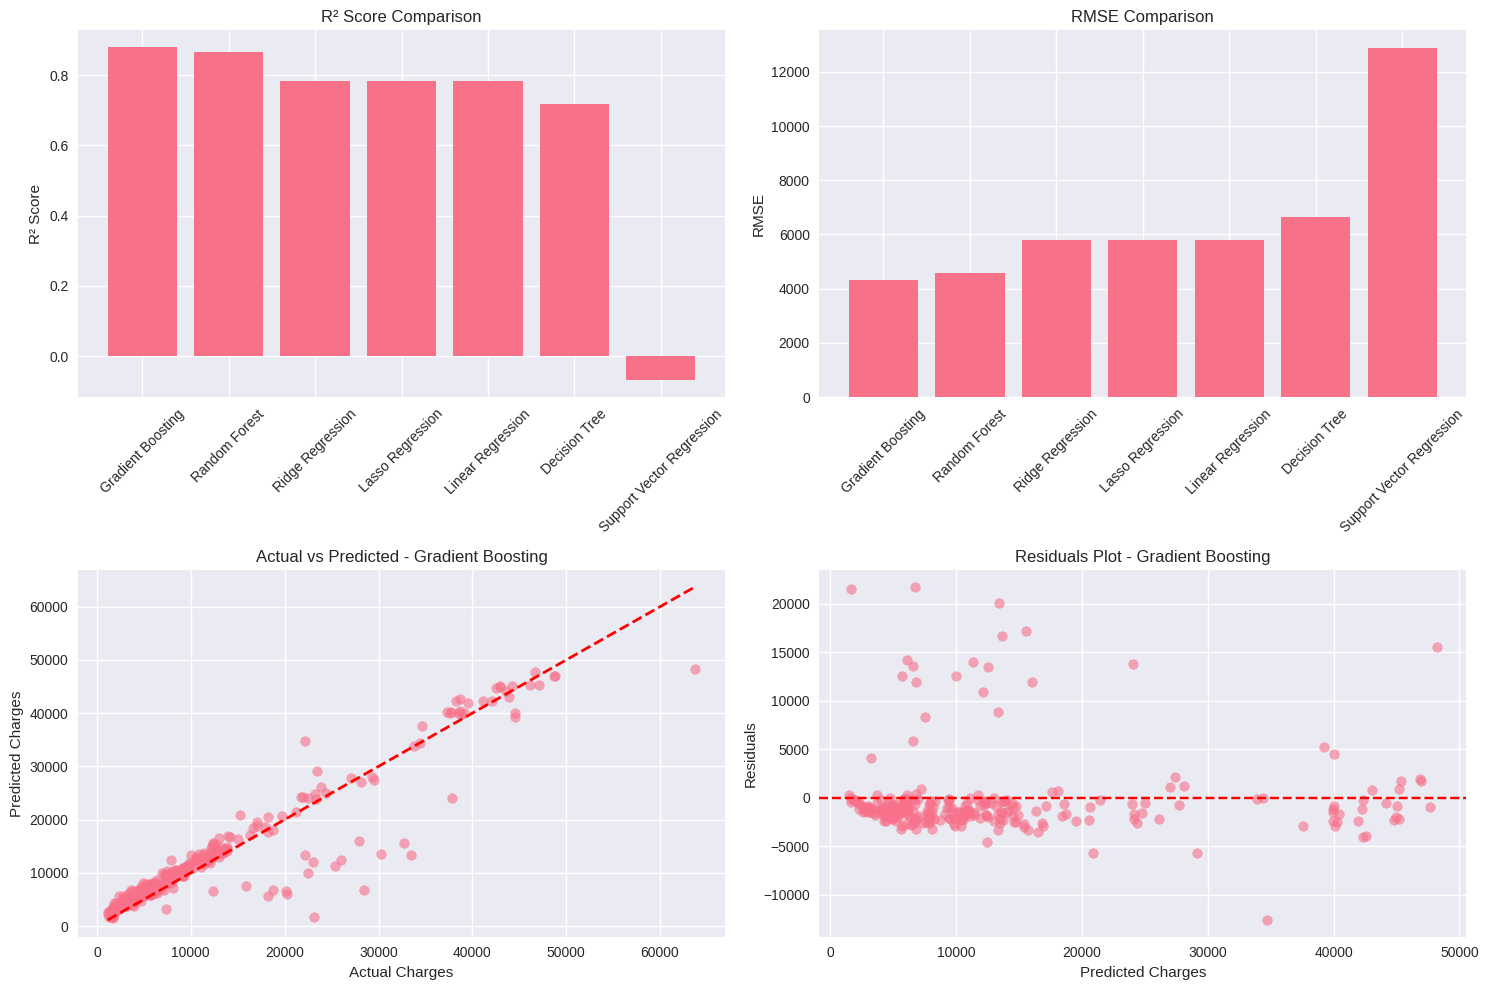


🔧 Hyperparameter Tuning for Gradient Boosting
✅ Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
✅ Tuned model R²: 0.8825
✅ Tuned model RMSE: 4271.46
✅ Improvement in R²: 0.0023

🎯 Feature Importance - Gradient Boosting
          feature  importance
   smoker_encoded    0.237275
        smoker_no    0.231424
       smoker_yes    0.217717
              age    0.116549
              bmi    0.107968
    bmi_cat_Obese    0.072915
         children    0.009541
   region_encoded    0.002629
age_group_encoded    0.001120
 age_group_Senior    0.000730


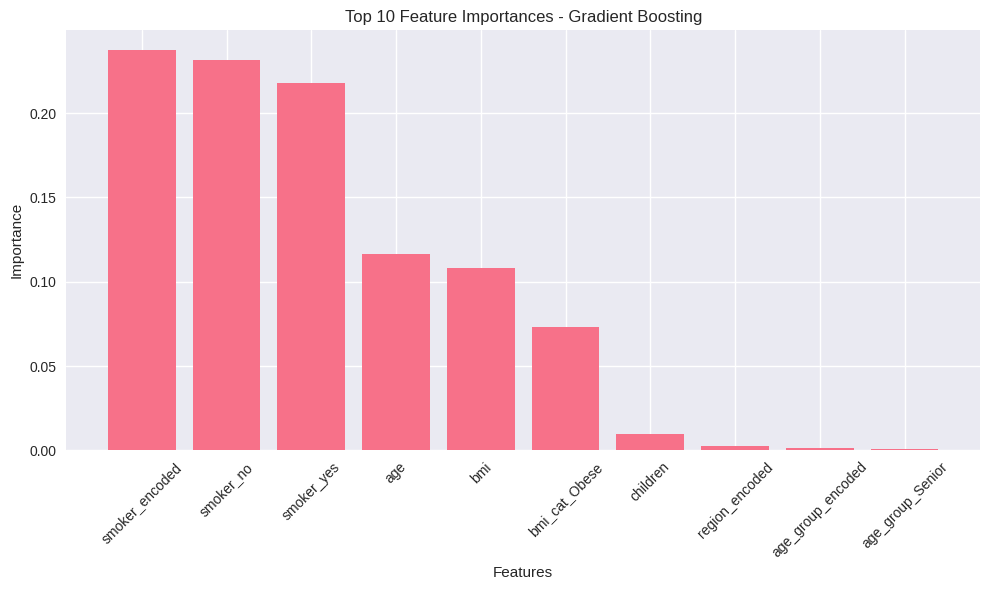


🔮 Sample Prediction:
For a 35-year-old male with BMI 25.5, 2 children, non-smoker from southeast:
Predicted insurance cost: $8304.51
✅ Model artifacts saved successfully!
📦 Files saved: insurance_cost_model.pkl

🎉 PROJECT SUMMARY
✅ Best performing model: Gradient Boosting
✅ Final R² Score: 0.8825
✅ Final RMSE: 4271.46
✅ Model saved for deployment

📋 Next Steps for Deployment:
1. 🐱 Create GitHub repository
2. 🤗 Deploy on Hugging Face Spaces
3. 🌐 Create web interface using Streamlit/Gradio
4. 📊 Add model monitoring and retraining pipeline
5. 📝 Create comprehensive documentation

💡 Key Insights:
Top 3 most important features: smoker_encoded, smoker_no, smoker_yes

🚀 Ready for production deployment!


In [16]:
# Health Insurance Cost Prediction - Traditional ML Approach
# Author: Data Science Team
# Date: July 2025

# =============================================================================
# 1. SETUP AND IMPORTS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Health Insurance Cost Prediction Project")
print("=" * 50)

# =============================================================================
# 2. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
# Note: Download from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
# For Colab, upload the file or use Kaggle API

df = pd.read_csv('/content/insurance.csv')

# Display basic information
print("\n📋 Dataset Information:")
print(df.info())
print("\n📊 First 5 rows:")
print(df.head())
print("\n📈 Statistical Summary:")
print(df.describe())

# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

def perform_eda(df):
    """Comprehensive EDA function"""

    # Check for missing values
    print("\n🔍 Missing Values Check:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found! ✅")

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Duplicate rows: {duplicates}")

    # Distribution of target variable
    plt.figure(figsize=(15, 10))

    # Subplot 1: Distribution of charges
    plt.subplot(2, 3, 1)
    plt.hist(df['charges'], bins=50, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Insurance Charges')
    plt.xlabel('Charges ($)')
    plt.ylabel('Frequency')

    # Subplot 2: Age distribution
    plt.subplot(2, 3, 2)
    plt.hist(df['age'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    # Subplot 3: BMI distribution
    plt.subplot(2, 3, 3)
    plt.hist(df['bmi'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('BMI Distribution')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')

    # Subplot 4: Smoker vs Charges
    plt.subplot(2, 3, 4)
    sns.boxplot(data=df, x='smoker', y='charges')
    plt.title('Charges by Smoker Status')
    plt.xticks(rotation=45)

    # Subplot 5: Region vs Charges
    plt.subplot(2, 3, 5)
    sns.boxplot(data=df, x='region', y='charges')
    plt.title('Charges by Region')
    plt.xticks(rotation=45)

    # Subplot 6: Children vs Charges
    plt.subplot(2, 3, 6)
    sns.boxplot(data=df, x='children', y='charges')
    plt.title('Charges by Number of Children')

    plt.tight_layout()
    plt.show()

    # Correlation analysis
    print("\n📊 Correlation Analysis:")
    # Create a copy for correlation (encode categorical variables)
    df_corr = df.copy()
    le = LabelEncoder()
    for col in ['sex', 'smoker', 'region']:
        df_corr[col] = le.fit_transform(df_corr[col])

    plt.figure(figsize=(10, 8))
    correlation_matrix = df_corr.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    return df

# Perform EDA
df_clean = perform_eda(df)

# =============================================================================
# 4. DATA PREPROCESSING
# =============================================================================

def preprocess_data(df):
    """Preprocess the data for machine learning"""

    df_processed = df.copy()

    # Handle outliers in BMI (optional)
    Q1 = df_processed['bmi'].quantile(0.25)
    Q3 = df_processed['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"📊 BMI outliers: {((df_processed['bmi'] < lower_bound) | (df_processed['bmi'] > upper_bound)).sum()}")

    # Create age groups (feature engineering)
    df_processed['age_group'] = pd.cut(df_processed['age'],
                                     bins=[0, 25, 35, 50, 100],
                                     labels=['Young', 'Adult', 'Middle', 'Senior'])

    # BMI categories
    df_processed['bmi_category'] = pd.cut(df_processed['bmi'],
                                        bins=[0, 18.5, 25, 30, 100],
                                        labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

    # Encode categorical variables
    le_sex = LabelEncoder()
    le_smoker = LabelEncoder()
    le_region = LabelEncoder()
    le_age_group = LabelEncoder()
    le_bmi_category = LabelEncoder()

    df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])
    df_processed['smoker_encoded'] = le_smoker.fit_transform(df_processed['smoker'])
    df_processed['region_encoded'] = le_region.fit_transform(df_processed['region'])
    df_processed['age_group_encoded'] = le_age_group.fit_transform(df_processed['age_group'])
    df_processed['bmi_category_encoded'] = le_bmi_category.fit_transform(df_processed['bmi_category'])

    # One-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region', 'age_group', 'bmi_category'],
                               prefix=['sex', 'smoker', 'region', 'age_group', 'bmi_cat'])

    # Select features for modeling
    feature_columns = ['age', 'bmi', 'children'] + [col for col in df_encoded.columns if any(prefix in col for prefix in ['sex_', 'smoker_', 'region_', 'age_group_', 'bmi_cat_'])]

    X = df_encoded[feature_columns]
    y = df_encoded['charges']

    print(f"✅ Preprocessing complete!")
    print(f"📊 Feature shape: {X.shape}")
    print(f"📊 Target shape: {y.shape}")

    return X, y, df_processed

# Preprocess data
X, y, df_processed = preprocess_data(df_clean)

# =============================================================================
# 5. MODEL BUILDING AND TRAINING
# =============================================================================

def train_models(X, y):
    """Train multiple models and compare performance"""

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Support Vector Regression': SVR(kernel='rbf')
    }

    results = {}

    print("🚀 Training Models...")
    print("=" * 50)

    for name, model in models.items():
        print(f"Training {name}...")

        # Use scaled data for SVR and regularized models
        if name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {
            'model': model,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'mae': mae,
            'predictions': y_pred
        }

        print(f"✅ {name} - R²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

    return results, X_train, X_test, y_train, y_test, scaler

# Train models
model_results, X_train, X_test, y_train, y_test, scaler = train_models(X, y)

# =============================================================================
# 6. MODEL EVALUATION AND COMPARISON
# =============================================================================

def evaluate_models(results, y_test):
    """Evaluate and compare model performance"""

    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'R² Score': [results[model]['r2'] for model in results.keys()],
        'RMSE': [results[model]['rmse'] for model in results.keys()],
        'MAE': [results[model]['mae'] for model in results.keys()],
        'MSE': [results[model]['mse'] for model in results.keys()]
    })

    # Sort by R² score
    comparison_df = comparison_df.sort_values('R² Score', ascending=False)

    print("\n📊 Model Performance Comparison:")
    print("=" * 60)
    print(comparison_df.to_string(index=False))

    # Visualize results
    plt.figure(figsize=(15, 10))

    # R² Score comparison
    plt.subplot(2, 2, 1)
    plt.bar(comparison_df['Model'], comparison_df['R² Score'])
    plt.title('R² Score Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('R² Score')

    # RMSE comparison
    plt.subplot(2, 2, 2)
    plt.bar(comparison_df['Model'], comparison_df['RMSE'])
    plt.title('RMSE Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('RMSE')

    # Actual vs Predicted for best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_predictions = results[best_model_name]['predictions']

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, best_predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Actual vs Predicted - {best_model_name}')

    # Residuals plot
    plt.subplot(2, 2, 4)
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')

    plt.tight_layout()
    plt.show()

    return comparison_df, best_model_name

# Evaluate models
comparison_df, best_model_name = evaluate_models(model_results, y_test)

# =============================================================================
# 7. HYPERPARAMETER TUNING FOR BEST MODEL
# =============================================================================

def tune_best_model(X_train, y_train, X_test, y_test, best_model_name, model_results):
    """Perform hyperparameter tuning for the best model"""

    print(f"\n🔧 Hyperparameter Tuning for {best_model_name}")
    print("=" * 50)

    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestRegressor(random_state=42)

    elif best_model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
        model = GradientBoostingRegressor(random_state=42)

    elif best_model_name == 'Ridge Regression':
        param_grid = {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
        model = Ridge()

    else:
        print(f"Hyperparameter tuning not implemented for {best_model_name}")
        return model_results[best_model_name]['model']

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Evaluate tuned model
    y_pred_tuned = best_model.predict(X_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Tuned model R²: {r2_tuned:.4f}")
    print(f"✅ Tuned model RMSE: {rmse_tuned:.2f}")
    print(f"✅ Improvement in R²: {r2_tuned - model_results[best_model_name]['r2']:.4f}")

    return best_model

# Tune the best model
final_model = tune_best_model(X_train, y_train, X_test, y_test, best_model_name, model_results)

# =============================================================================
# 8. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

def analyze_feature_importance(model, X, model_name):
    """Analyze and visualize feature importance"""

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns

        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\n🎯 Feature Importance - {model_name}")
        print("=" * 40)
        print(importance_df.head(10).to_string(index=False))

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df.head(10)['feature'], importance_df.head(10)['importance'])
        plt.title(f'Top 10 Feature Importances - {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"Feature importance not available for {model_name}")
        return None

# Analyze feature importance
importance_df = analyze_feature_importance(final_model, X, best_model_name)

# =============================================================================
# 9. PREDICTION FUNCTION
# =============================================================================

def predict_insurance_cost(model, scaler, age, sex, bmi, children, smoker, region, X_columns):
    """Predict insurance cost for new data"""

    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })

    # Add age and BMI categories
    input_data['age_group'] = pd.cut(input_data['age'],
                                   bins=[0, 25, 35, 50, 100],
                                   labels=['Young', 'Adult', 'Middle', 'Senior'])
    input_data['bmi_category'] = pd.cut(input_data['bmi'],
                                      bins=[0, 18.5, 25, 30, 100],
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

    # One-hot encode
    input_encoded = pd.get_dummies(input_data, columns=['sex', 'smoker', 'region', 'age_group', 'bmi_category'],
                                  prefix=['sex', 'smoker', 'region', 'age_group', 'bmi_cat'])

    # Ensure all columns are present
    for col in X_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training data
    input_encoded = input_encoded[X_columns]

    # Make prediction
    if best_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
        input_scaled = scaler.transform(input_encoded)
        prediction = model.predict(input_scaled)[0]
    else:
        prediction = model.predict(input_encoded)[0]

    return prediction

# Example prediction
sample_prediction = predict_insurance_cost(
    final_model, scaler,
    age=35, sex='male', bmi=25.5, children=2, smoker='no', region='southeast',
    X_columns=X.columns
)

print(f"\n🔮 Sample Prediction:")
print(f"For a 35-year-old male with BMI 25.5, 2 children, non-smoker from southeast:")
print(f"Predicted insurance cost: ${sample_prediction:.2f}")

# =============================================================================
# 10. MODEL DEPLOYMENT PREPARATION
# =============================================================================

import pickle
import joblib

def save_model_artifacts(model, scaler, X_columns, model_name):
    """Save model and preprocessing artifacts"""

    # Create model artifacts dictionary
    artifacts = {
        'model': model,
        'scaler': scaler,
        'feature_columns': X_columns.tolist(),
        'model_name': model_name
    }

    # Save using joblib (recommended for scikit-learn models)
    joblib.dump(artifacts, 'insurance_cost_model.pkl')

    print("✅ Model artifacts saved successfully!")
    print("📦 Files saved: insurance_cost_model.pkl")

    return artifacts

# Save model artifacts
model_artifacts = save_model_artifacts(final_model, scaler, X.columns, best_model_name)

# =============================================================================
# 11. SUMMARY AND NEXT STEPS
# =============================================================================

print("\n" + "="*60)
print("🎉 PROJECT SUMMARY")
print("="*60)
print(f"✅ Best performing model: {best_model_name}")
print(f"✅ Final R² Score: {r2_score(y_test, final_model.predict(X_test)):.4f}")
print(f"✅ Final RMSE: {np.sqrt(mean_squared_error(y_test, final_model.predict(X_test))):.2f}")
print(f"✅ Model saved for deployment")

print("\n📋 Next Steps for Deployment:")
print("1. 🐱 Create GitHub repository")
print("2. 🤗 Deploy on Hugging Face Spaces")
print("3. 🌐 Create web interface using Streamlit/Gradio")
print("4. 📊 Add model monitoring and retraining pipeline")
print("5. 📝 Create comprehensive documentation")

print("\n💡 Key Insights:")
if importance_df is not None:
    top_features = importance_df.head(3)['feature'].tolist()
    print(f"Top 3 most important features: {', '.join(top_features)}")

print("\n🚀 Ready for production deployment!")

In [17]:
# prompt: save the model and his things

def save_model_artifacts(model, scaler, X_columns, model_name):
    """Save model and preprocessing artifacts"""

    # Create model artifacts dictionary
    artifacts = {
        'model': model,
        'scaler': scaler,
        'feature_columns': X_columns.tolist(),
        'model_name': model_name
    }

    # Save using joblib (recommended for scikit-learn models)
    joblib.dump(artifacts, 'insurance_cost_model.pkl')

    print("✅ Model artifacts saved successfully!")
    print("📦 Files saved: insurance_cost_model.pkl")

    return artifacts

# Save model artifacts
model_artifacts = save_model_artifacts(final_model, scaler, X.columns, best_model_name)



✅ Model artifacts saved successfully!
📦 Files saved: insurance_cost_model.pkl


In [19]:
# prompt: save the scaler too

def save_model_artifacts(model, scaler, X_columns, model_name):
    """Save model and preprocessing artifacts"""

    # Create model artifacts dictionary
    artifacts = {
        'model': model,
        'scaler': scaler,
        'feature_columns': X_columns.tolist(),
        'model_name': model_name
    }

    # Save using joblib (recommended for scikit-learn models)
    joblib.dump(artifacts, 'insurance_cost_model.pkl')

    print("✅ Model artifacts saved successfully!")
    print("📦 Files saved: insurance_cost_model.pkl")

    return artifacts

# Save model artifacts
model_artifacts = save_model_artifacts(final_model, scaler, X.columns, best_model_name)


✅ Model artifacts saved successfully!
📦 Files saved: insurance_cost_model.pkl


In [18]:
# prompt: deploy the model on gradio

!pip install gradio

import gradio as gr

# Load the saved model and artifacts
try:
    model_artifacts = joblib.load('insurance_cost_model.pkl')
    loaded_model = model_artifacts['model']
    loaded_scaler = model_artifacts['scaler']
    loaded_feature_columns = model_artifacts['feature_columns']
    loaded_model_name = model_artifacts['model_name']
    print("Model artifacts loaded successfully.")
except FileNotFoundError:
    print("Error: 'insurance_cost_model.pkl' not found. Please ensure the model was saved.")
    loaded_model = None
    loaded_scaler = None
    loaded_feature_columns = None
    loaded_model_name = None

# Define the prediction function for Gradio
def predict_charge(age, sex, bmi, children, smoker, region):
    if loaded_model is None:
        return "Error: Model not loaded."

    try:
        # Create input dataframe
        input_data = pd.DataFrame({
            'age': [age],
            'sex': [sex],
            'bmi': [bmi],
            'children': [children],
            'smoker': [smoker],
            'region': [region]
        })

        # Add age and BMI categories - ensure these match the preprocessing in the notebook
        input_data['age_group'] = pd.cut(input_data['age'],
                                       bins=[0, 25, 35, 50, 100],
                                       labels=['Young', 'Adult', 'Middle', 'Senior'],
                                       right=True, # Consistent with default pd.cut behavior
                                       include_lowest=True) # Ensure lowest age is included

        input_data['bmi_category'] = pd.cut(input_data['bmi'],
                                          bins=[0, 18.5, 25, 30, 100],
                                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'],
                                          right=True,
                                          include_lowest=True)


        # One-hot encode
        # Need to handle potential missing categories if input data doesn't have all of them
        # A robust way is to fit the encoder on the original training data's categorical columns
        # or ensure the `pd.get_dummies` call creates columns for all possible categories
        # from the training data.

        # For simplicity here, we recreate the get_dummies process and align columns
        input_encoded = pd.get_dummies(input_data, columns=['sex', 'smoker', 'region', 'age_group', 'bmi_category'],
                                      prefix=['sex', 'smoker', 'region', 'age_group', 'bmi_cat'])

        # Ensure all columns from training data are present in the input
        # and reorder them to match the training data used by the model
        final_input = pd.DataFrame(0, index=[0], columns=loaded_feature_columns)
        for col in input_encoded.columns:
            if col in final_input.columns:
                final_input[col] = input_encoded[col].values # Use .values to avoid index issues

        # Make prediction
        if loaded_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression'] and loaded_scaler is not None:
            input_scaled = loaded_scaler.transform(final_input)
            prediction = loaded_model.predict(input_scaled)[0]
        else:
            prediction = loaded_model.predict(final_input)[0]

        return f"Predicted Insurance Charge: ${prediction:.2f}"

    except Exception as e:
        return f"An error occurred during prediction: {e}"


# Create Gradio Interface
if loaded_model is not None:
    interface = gr.Interface(
        fn=predict_charge,
        inputs=[
            gr.Slider(minimum=18, maximum=64, step=1, label="Age"),
            gr.Radio(choices=['female', 'male'], label="Sex"),
            gr.Number(label="BMI"),
            gr.Slider(minimum=0, maximum=5, step=1, label="Children"),
            gr.Radio(choices=['yes', 'no'], label="Smoker"),
            gr.Dropdown(choices=['northeast', 'southeast', 'southwest', 'northwest'], label="Region")
        ],
        outputs="text",
        title="Health Insurance Cost Predictor",
        description="Enter patient details to predict insurance charges."
    )

    # Launch the interface
    interface.launch()
else:
    print("Cannot launch Gradio interface because the model was not loaded.")



Model artifacts loaded successfully.
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0b821b61918de6aba1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
